In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5076,ham,"Guy, no flash me now. If you go call me, call ...",NaN,NaN,NaN
1552,ham,U too...,NaN,NaN,NaN
1810,ham,"Now, whats your house # again ? And do you hav...",NaN,NaN,NaN
5522,ham,Thats cool. I want to please you...,NaN,NaN,NaN
2161,ham,Is she replying. Has boye changed his phone nu...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#Data cleaning 
#EDA
#Text Preprocessing
#Model Building
#Evaluation
#Improvement 
#website

# **Data** **Cleaning** 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
5445,ham,"And that's fine, I got enough bud to last most..."
2968,ham,Ma head dey swell oh. Thanks for making my day
2550,ham,Please sen :)my kind advice :-)please come her...
5138,ham,Yup... I havent been there before... You want ...
1575,ham,"Sounds gd... Haha... Can... Wah, u yan jiu so ..."


In [ ]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Change the target into 0 & 1. "Ham == 0" "Spam == 1"
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checking missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# Checking duplicate values
df.duplicated().sum()

403

In [ ]:
# remove  duplicated values
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape


(5169, 2)

# **EDA**



In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

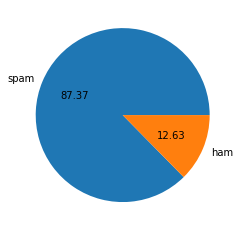

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels={'ham','spam'},autopct='%0.2f')
plt.show()

In [ ]:
# See, the data is imbalance
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# calculate the num of characters and place into a new column
df['num_chars'] =df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Calculate the num of words and place into a new column
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Calculate the num of sentances and place into a new column
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# For ham
df[df['target']==0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# For spam
df[df['target']==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [ ]:
import seaborn as sns

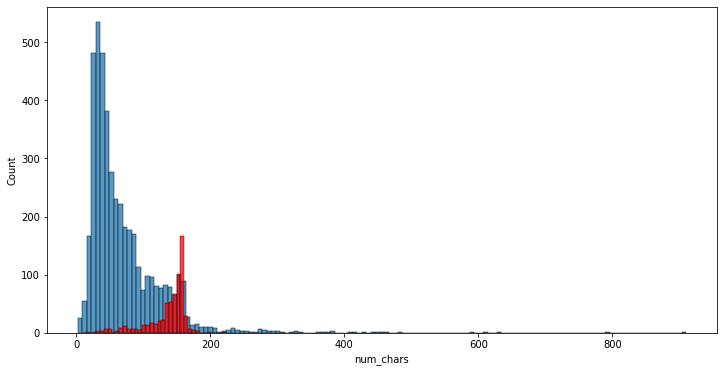

In [ ]:
#By graph, check the num of chars in spam and ham text
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red')

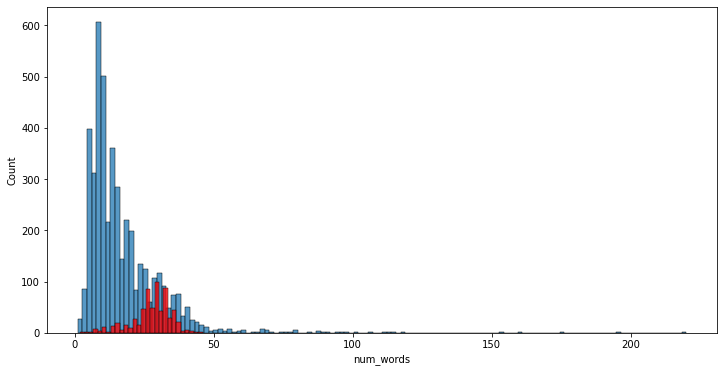

In [ ]:
#By graph, check the num of words in spam and ham text
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

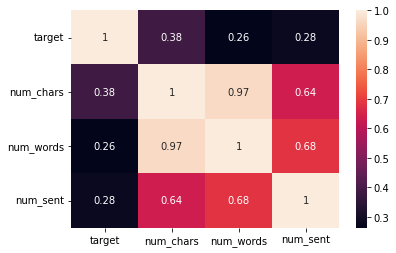

In [ ]:
sns.heatmap(df.corr(),annot=True)

# **Data Preprocessing**

*   **Lower case**
*   **Tokenization**
*   **Remove Specical Chars**
*   **Remove stopwords & punctuation**
*   Stemming









In [ ]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords #if this line amke any error then comment it. And remove "#" from the blow 2 lines
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
transform_text('Hey baby i am % busy in office ?')

'hey babi busi offic'

In [ ]:
df['trans_text'] =df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_chars,num_words,num_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#lets check the most words use in spam text
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

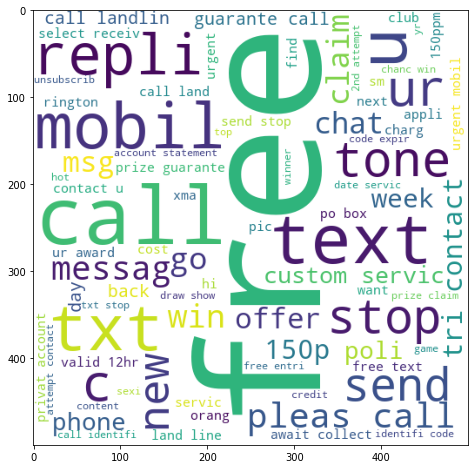

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [ ]:
#ham text
ham_wc = wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

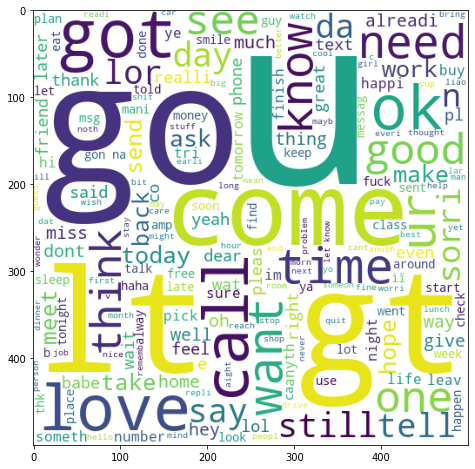

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [ ]:
#lets get the top 30 words in spam text
spam_corr=[]
for msg in df[df['target']==1]['trans_text'].tolist():
  for word in msg.split():
    spam_corr.append(word)
    

In [ ]:
len(spam_corr)

9939

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


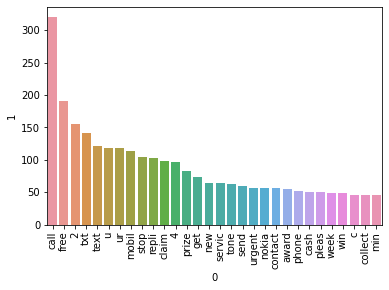

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corr).most_common(30))[0],pd.DataFrame(Counter(spam_corr).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#lets get the top 30 words in ham text
ham_corr=[]
for msg in df[df['target']==0]['trans_text'].tolist():
  for word in msg.split():
    ham_corr.append(word)

In [ ]:
len(ham_corr)

35394

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


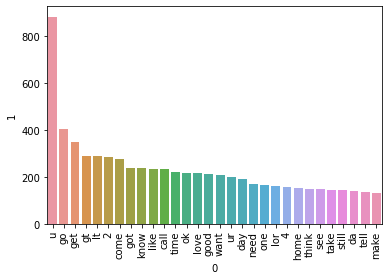

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corr).most_common(30))[0],pd.DataFrame(Counter(ham_corr).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# **Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tf= TfidfVectorizer(max_features=3000)

In [ ]:
X=tf.fit_transform(df['trans_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
Y=df['target'].values

In [ ]:
Y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#lets train the data by gaussianNB
gnb.fit(X_train,Y_train)
y_predit = gnb.predict(X_test)
print(accuracy_score(Y_test,y_predit))
print(confusion_matrix(Y_test,y_predit))
print(precision_score(Y_test,y_predit))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,Y_train)
y_predit2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_predit2))
print(confusion_matrix(Y_test,y_predit2))
print(precision_score(Y_test,y_predit2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,Y_train)
y_predit3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_predit3))
print(confusion_matrix(Y_test,y_predit3))
print(precision_score(Y_test,y_predit3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
